Name of Student: - ANIRUDHA MULGUND
Roll no: - MM1921413
Reg. No: - 23-1486
Specialization: - BUSINESS ANALYTICS
Batch: - 2019-21
Institute: - BIMM
Semester: - III
Subject Name: - Retail Analytics
Assignment No: - 01
Submission Date: - 29-11-2020


In [1]:
#import relevent library

In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import os
import statsmodels.api as sm

In [3]:
# Define-  Here, want to predict the sales of Furniture items from the superstore

In [4]:
# Collect- Sources of data : Standard dataset provided by the academics (Secondary Data)

In [5]:
df= pd.read_excel("Sample - Superstore.xls")

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# Organize- Arranging furniture data on the basis of year with respective Sales.

In [8]:
furniture= df.loc[df["Category"] =="Furniture"]

In [9]:
#Checking the latest and the oldest order date
furniture["Order Date"].min(),furniture["Order Date"].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
cols=["Row ID","Order ID","Ship Date","Ship Mode","Customer ID","Customer Name","Segment","Country","City","State","Postal Code","Product Name",
      "Quantity","Region","Product ID","Category","Discount","Profit","Sub-Category"]

In [12]:
furniture.drop(cols, axis= 1,inplace=True)

In [13]:
furniture= furniture.sort_values('Order Date')

In [14]:
# O = Organising

# check for missing values 

In [15]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [16]:
#No missing values

In [17]:
furniture["Order Date"] 
# as we can see there is not data in some dates, so we have to consider it monthly
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [18]:
furniture= furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [19]:
#Indexing
furniture= furniture.set_index('Order Date')    
# As furniture sales is not regular, so sales is not done on daily basis
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [20]:
# Monthly average sales
y= furniture['Sales'].resample('MS').mean()

In [21]:
y["2017":]   # therefore, monthly basis sales

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [22]:
# Visualization

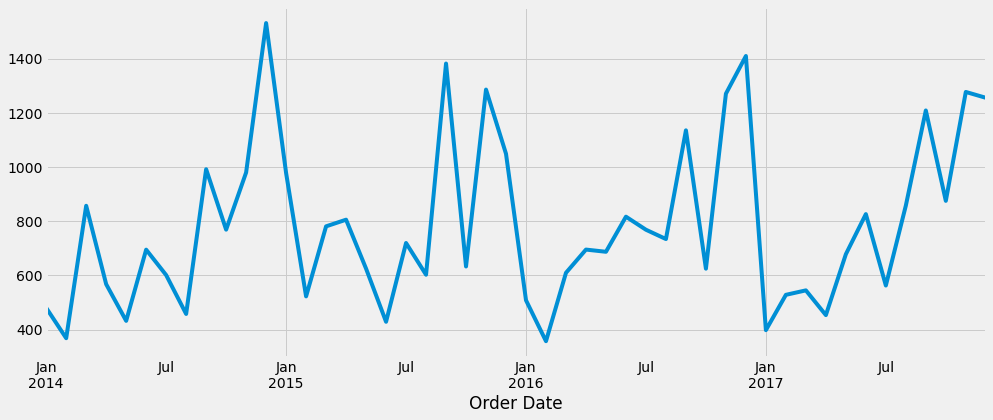

In [23]:
y.plot(figsize= (15,6))
plt.show()

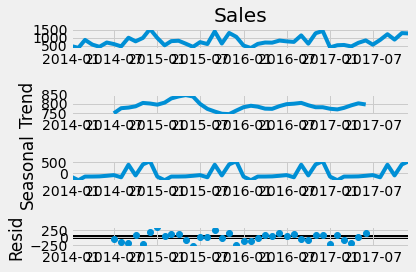

In [24]:
# Time series decomposition
# 3 distinct components: trend,seasonality and error/ noise
from pylab import rcParams
decomposition= sm.tsa.seasonal_decompose(y,model= 'additive')
fig= decomposition.plot()
figsize=(20,40)
plt.show()

In [25]:
#Autoregressive Integarted Moving Average
#ARIMA model is denoted by the notation(p,d,q)  p- trend d- seasonality q- resedual/noise
#seasonality, trend and noice in data
# This step is parameter selection for furniture sales
p =d =q =range(0,2)
pdq= list(itertools.product(p,d,q))
seasonal_pdq= [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))  # 4 seasons in the year quarterwise
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [26]:
#use the grid search to find the optimal set of parameters
#that yield the best performance for our model.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod= sm.tsa.statespace.SARIMAX(y,
                                          order=param,
                                          seasonal_order= param_seasonal,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
            results=mod.fit()
            print("ARIMA{}x{}12 - AIC:{}".format(param,param_seasonal.results.aic))
        except:
                continue

C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Anirudha Mulgund\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Anirudha Mulgund\anaconda3\lib\site-package

In [27]:
# SARIMAX (1,1,1) x (1,1,0,12) has the lowest AIC value of 297.78
#fit the model
mod= sm.tsa.statespace.SARIMAX(y,
                               order=(1,1,1),
                               seasonal_order= (1,1,0,12),
                               enforce_stationarity=False,
                               enforce_invertibility=False)

results =mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


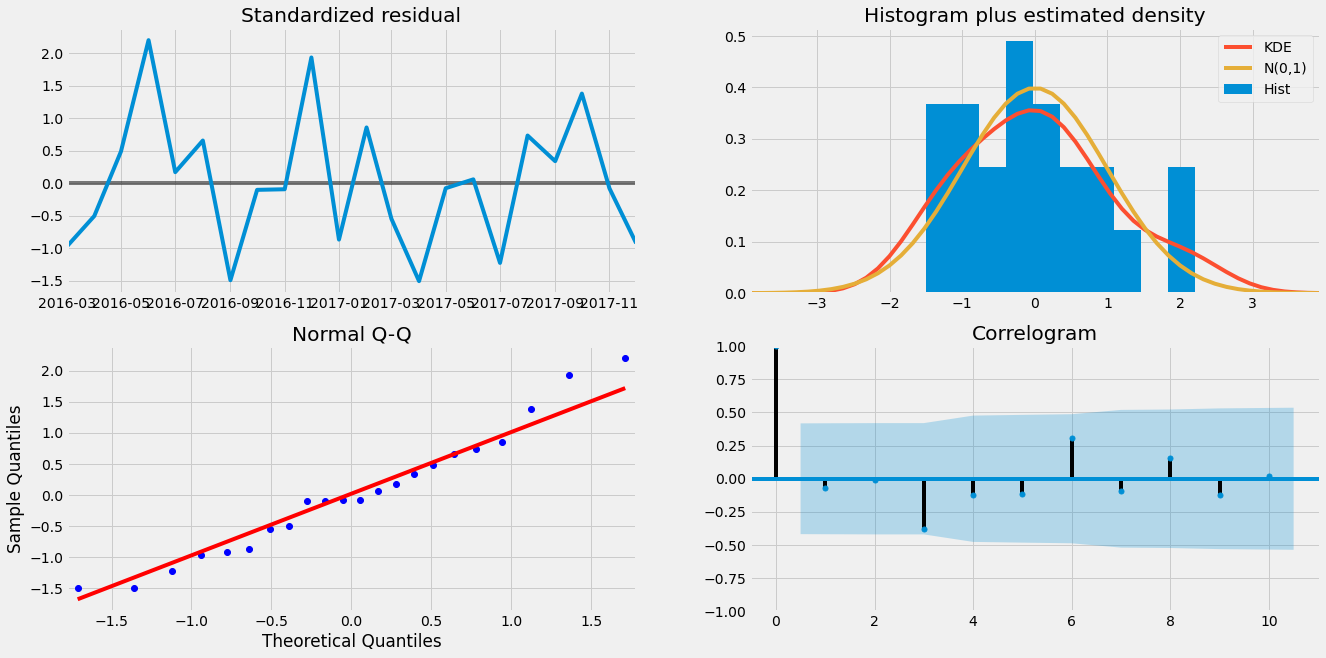

In [28]:
#check model
results.plot_diagnostics(figsize= (20,10))
plt.show()

In [29]:
# As we can see our error should be normally distributed which means. 
#That means,if I could able to sell 10 units more than the predicted every month 
#then I should add 10 units to my model iteslf, as histogram is showing -ve value 
#also of prediction which states that our predicted value may be wrong sometimes--> 
#which is fine and also our model is working fine with respect to the real life condition

In [30]:
# Validate
pred= results.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic= False)
pred_ci =pred.conf_int()

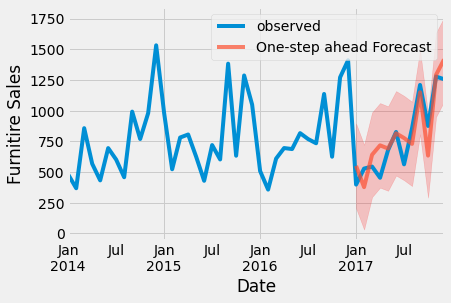

In [31]:
ax= y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label= 'One-step ahead Forecast',alpha= 0.7)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='r',alpha=0.2)

ax.set_xlabel("Date")
ax.set_ylabel("Furnitire Sales")
plt.legend()
plt.show()

In [32]:
# Mean is a measure of quality of an estimater- it is always non-negative
#and the smaller the MSE the closer the we are finding the line of best fit.

y_forecasted= pred.predicted_mean
y_truth= y["2017-01-01":]

# Compute the mean square error      
mse= ((y_forecasted - y_truth )**2).mean()    # mse- read ultha ==>e->error, s-<square, m->mean
print("The Mean Square Error of our forecast is {}".format(round(mse,2)))

The Mean Square Error of our forecast is 22993.51


In [33]:
print("The Mean Square Error of our forecast is {}".format(round(np.sqrt(mse),2)))

The Mean Square Error of our forecast is 151.64


In [34]:
# As this value is comes in readable format i.e 151.64 units is the mean error.

# Root mean square error(RMSE) tells us that our model was able to foracast the average daily
#furniture sales in the test set within 151.64 of the real sales.
# Our furniture daily sales range from around 400 to over 1200 .
# In my opinion this is the preety good model so far.

In [35]:
# visualizing forecasts
# computing the dynamic forecast and confidence interval from 2014 onwards

pred_dynamic= results.get_prediction(start= pd.to_datetime('2014-01-01'), dynamic= True, full_results= True)

pred_dynamic_ci= pred_dynamic.conf_int()

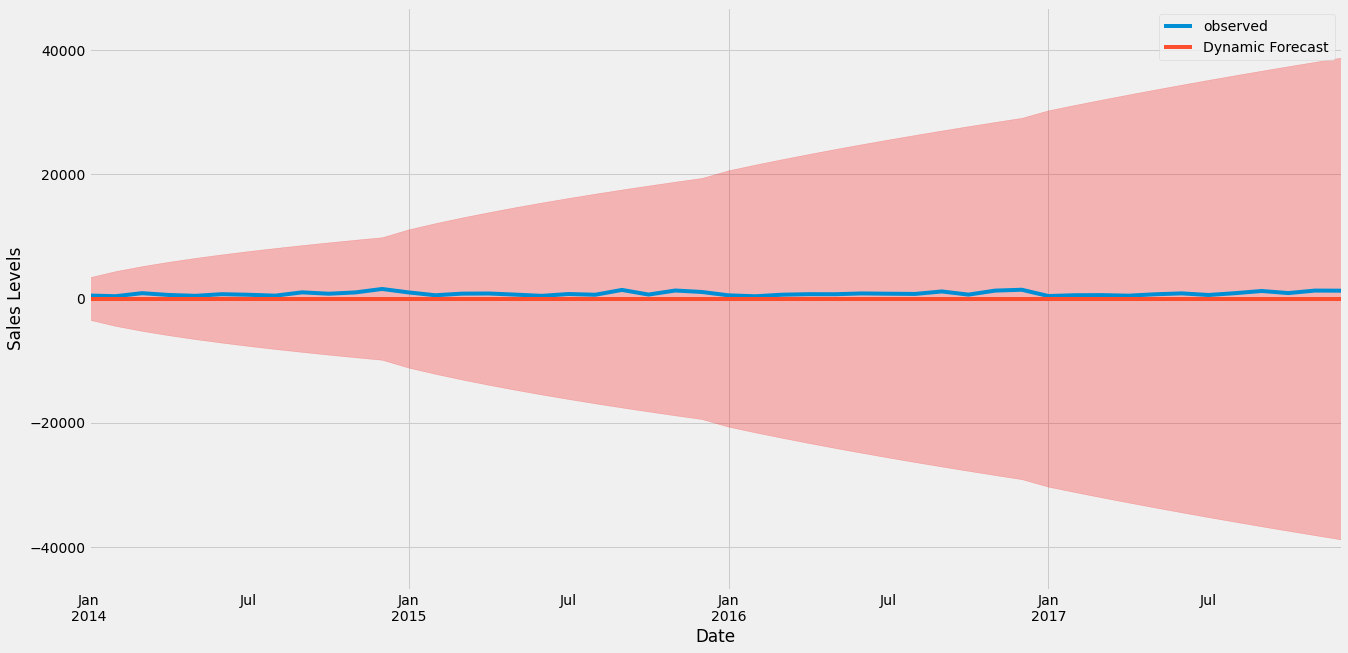

In [36]:
# Plotting the observed and the foresacted values of the series
ax= y['2014':].plot(label= 'observed',figsize=(20,10))
pred_dynamic.predicted_mean.plot(label= 'Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1],color='r',alpha=0.25)

ax.fill_betweenx(ax.get_ylim(),pd.to_datetime('2019-01-01'),y.index[-1],alpha=0.1,zorder= -1)

ax.set_xlabel('Date')
ax.set_ylabel('Sales Levels')
plt.legend()
plt.show()

In [37]:
# get forecast 500 or 25 steps ahead future as you want
pred_uc= results.get_forecast(steps=25 )   # 25 -> next 2 years

# get confidence interval of forecasts
pred_ci =pred_uc.conf_int()

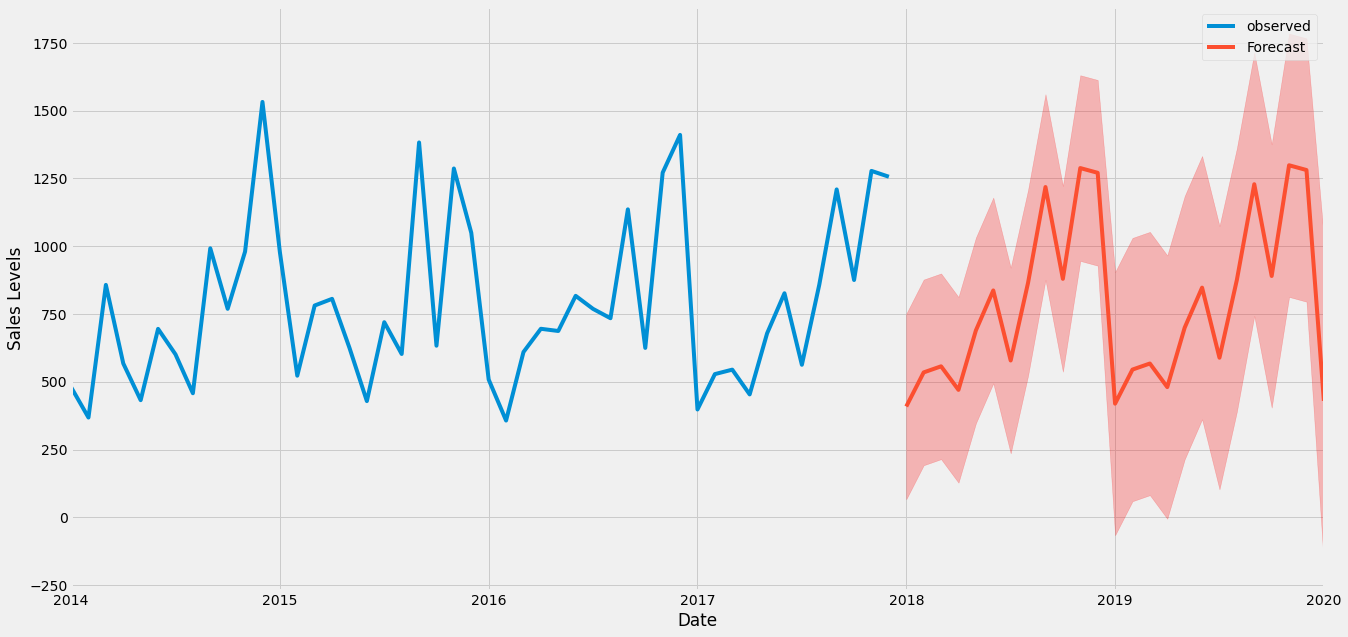

In [38]:


ax= y.plot(label= 'observed',figsize=(20,10))
pred_uc.predicted_mean.plot(label='Forecast', ax=ax)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],color='r',alpha=0.25)

ax.set_xlabel('Date')
ax.set_ylabel('Sales Levels')
plt.legend()
plt.show()



In [39]:
#Insight for the next years

In [40]:
# Change the start date of your input date to the model to see how this affects the overall
# quality of ur forecast. Eg.2015 onwards
# Try more combination of parameters to see if we can improve the goodness-of-fit of ypur model.

In [41]:
# visualizing forecasts
# computing the dynamic forecast and confidence interval from 2015 onwards

pred_dynamic= results.get_prediction(start= pd.to_datetime('2015-01-01'), dynamic= True, full_results= True)

pred_dynamic_ci= pred_dynamic.conf_int()

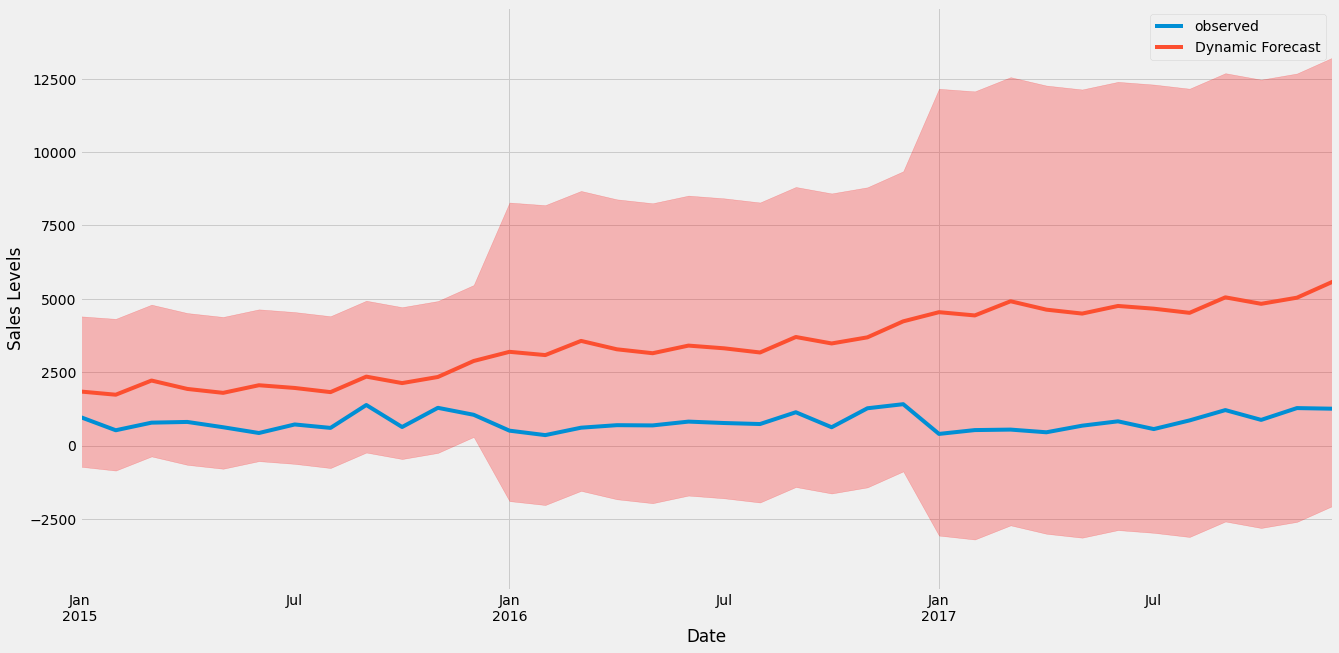

In [42]:


# Plotting the observed and the foresacted values of the series
ax= y['2015':].plot(label= 'observed',figsize=(20,10))
pred_dynamic.predicted_mean.plot(label= 'Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1],color='r',alpha=0.25)

ax.fill_betweenx(ax.get_ylim(),pd.to_datetime('2020-01-01'),y.index[-1],alpha=0.1,zorder= -1)

ax.set_xlabel('Date')
ax.set_ylabel('Sales Levels')
plt.legend()
plt.show()



In [43]:
# get forecast 500 or 25 steps ahead future as you want
pred_uc= results.get_forecast(steps=50 )   # 50 -> next 4 years

# get confidence interval of forecasts
pred_ci =pred_uc.conf_int()

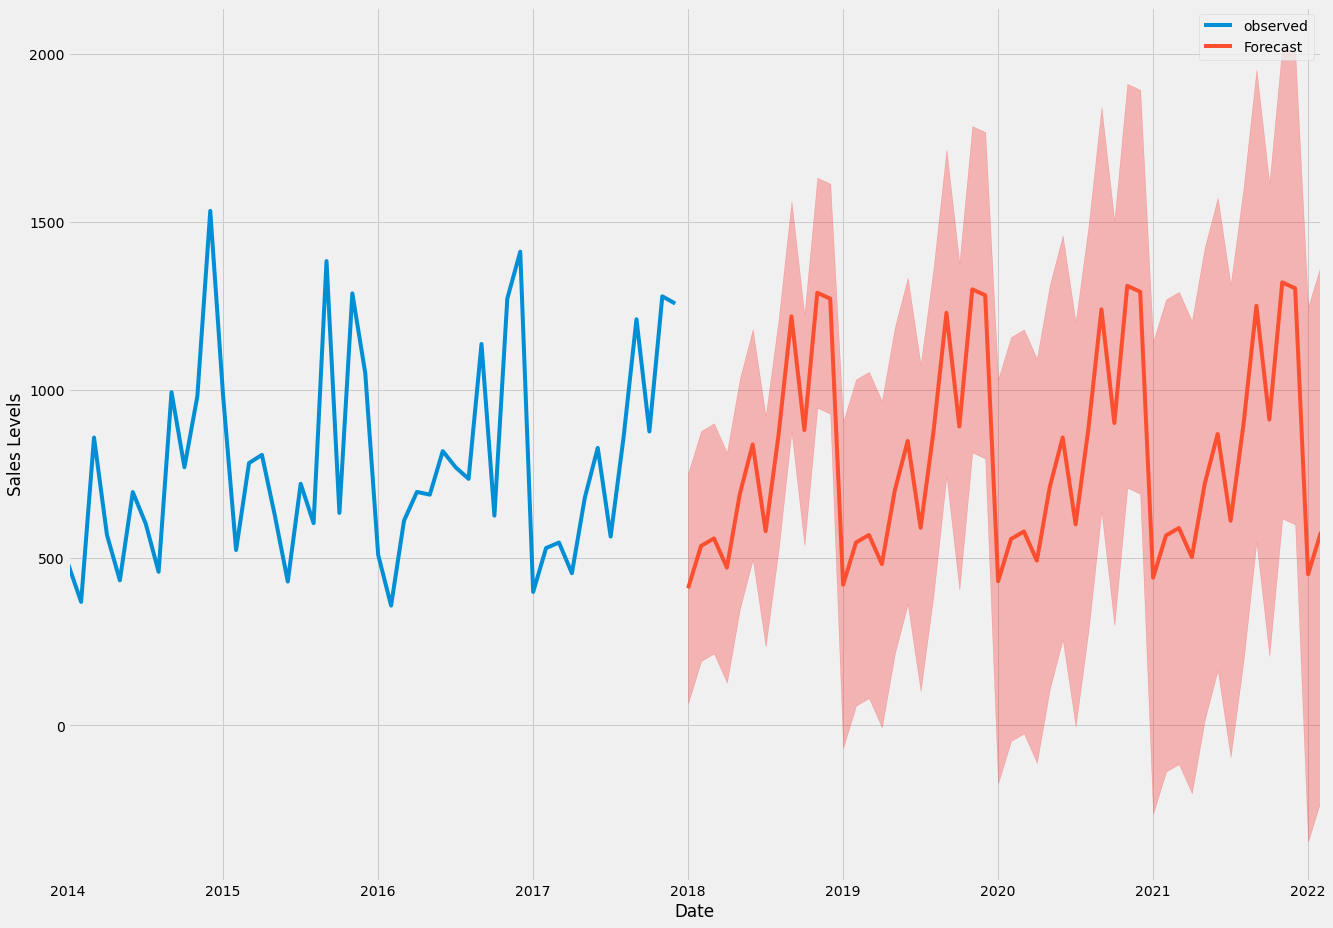

In [44]:
ax= y.plot(label= 'observed',figsize=(20,15))
pred_uc.predicted_mean.plot(label='Forecast', ax=ax)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],color='r',alpha=0.25)

ax.set_xlabel('Date')
ax.set_ylabel('Sales Levels')
plt.legend()
plt.show()